In [2]:
import nltk
import IPython.display as dp
from os import path

import context as c

In [3]:
#nltk.download()
#nltk.download('punkt')
#nltk.download('gutenberg')

In [4]:
book_name = path.join(c.DATA_PATH, 'capital.txt')

In [5]:
# загружаем текст
f = open(book_name, encoding="utf8")
raw = f.read()
num_char = len(raw)

tokenizer = nltk.NLTKWordTokenizer()

words = tokenizer.tokenize(raw)
# оставляем только те слова, которые полностью состоят из букв, чтобы избавиться от знаков пунктуации и мусора
words = [w for w in words if w.isalpha()]
# преобразуем слова в нижний регистр
words = [w.lower() for w in words]
word_count = len(words)
# создаём объект текста из предварительно обработанных слов
clean_text = nltk.Text(words)

# преобразуем слова из списка в множество, тем самым оставляем только уникальные
unique_words = set(words)
unique_word_count = len(unique_words)

sents = nltk.sent_tokenize(raw)
sents_count = len(sents)

print(f'Статистика по файлу {book_name}')
print('\tКоличество слов в тексте:', word_count)
print('\tКоличество уникальных слов в тексте:', unique_word_count)
print('\tКоличество предложений в тексте:', sents_count)
print(f'\tСредняя длина слова {int(num_char/word_count)} букв')
print(f'\tСредняя длина предложения {round(word_count/sents_count)} слов')
print('\tЛексическое разнообразие:', unique_word_count / word_count)
print(f'\tВ среднем одно слово встречается {int(word_count/unique_word_count)} раз')

Статистика по файлу data\capital.txt
	Количество слов в тексте: 81855
	Количество уникальных слов в тексте: 6425
	Количество предложений в тексте: 3136
	Средняя длина слова 6 букв
	Средняя длина предложения 26 слов
	Лексическое разнообразие: 0.07849245617250016
	В среднем одно слово встречается 12 раз


In [6]:
import string

# Токенизатор, который избавляется от всех знаков преминания
class CustomTokenizer:
    def tokenize(self, raw_text):
        result = []
        last_word = str()
        for c in raw_text:
            if (c.isspace() or c in string.punctuation):
                if last_word != '':
                    result.append(last_word)
                    last_word = ''
            else:
                last_word += c
            
        return result

# Правила взяты отсюда: https://medium.com/analytics-vidhya/building-a-stemmer-492e9a128e84
# Но код стеммера написан с нуля
class CustomStemmer:
    def stem(self, w):
        if (len(w) <= 2):
            return w

        step1 = [
            ('sses', 'ss'),
            ('ies', 'i'),
            ('ss', 'ss'),
            ('s', ''),
        ]

        step2 = [
            ('eed', 'ee'),
            ('ed', ''),
            ('ing', '')
            ]
        
        # выполняется, только если выполнился step2
        step2a = [
            ('at', 'ate'),
            ('bl', 'ble'),
            ('iz', 'ize'),
        ]

        step3 = [
            ('ational', 'ate'),
            ('tional', 'tion'),
            ('enci', 'ence'),
            ('anci', 'ance'),
            ('izer', 'ize'),
            ('abli', 'able'),
            ('alli', 'al'),
            ('entli', 'ent'),
            ('eli', 'e'),
            ('ousli', 'ous'),
            ('ization', 'ize'),
            ('ation', 'ate'),
            ('ator', 'ate'),
            ('alism', 'al'),
            ('iveness', 'ive'),
            ('fulness', 'ful'),
            ('ousness', 'ous'),
            ('aliti', 'al'),
            ('iviti', 'ive')
        ]
        step4 = [
            ('icate', 'ic'),
            ('ative', ''),
            ('alize', 'al'),
            ('iciti', 'ic'),
            ('ful', ''),
            ('ness', ''),
        ]

        step5 = [
            ('al', ''),
            ('ance', ''),
            ('ence', ''),
            ('er', ''),
            ('ic', ''),
            ('able', ''),
            ('ible', ''),
            ('ant', ''),
            ('ement', ''),
            ('ment', ''),
            ('ent', ''),
            ('ou', ''),
            ('ism', ''),
            ('ate', ''),
            ('iti', ''),
            ('ous', ''),
            ('ive', ''),
            ('ize', ''),
        ]

        if not w.isalpha():
            return w

        w, r = self._replace_ending(w, step1)
        w, r = self._replace_ending(w, step2)
        if r:
            w, r = self._replace_ending(w, step2a)
            # если последняя буква повторяется дважды
            if len(w) > 2 and (w[-1] == w[-2]):
                if w[-1] not in 'lsz':
                    w = w[:-1]
        w, r = self._replace_ending(w, step3)
        w, r = self._replace_ending(w, step4)
        w, r = self._replace_ending(w, step5)
        
        return w

    def _replace_ending(self, w, repls):
        for r in repls:
            if w.endswith(r[0]):
                return w[:-len(r[0])] + r[1], True
        return w, False


# Буду честным, украл алгоритм отсюда https://medium.com/analytics-vidhya/how-to-build-a-lemmatizer-7aeff7a1208c
# потому что я не эксперт в английском языке и ничего не понимаю в том, как сколняются слова
class CustomLemmatizer:
    def lemmatize(self, word):
        vowels = "aeiou"
        word = str(word).lower()
        if len(word) < 2:
            return word

        if word.endswith('s'):
            if len(word) > 3:
                #Leaves, wives, thieves
                if word.endswith('ves'):
                    if len(word[:-3]) > 2:
                        return word.replace('ves','f')
                    else:
                        return word.replace('ves','fe')
                #Parties, stories
                if word.endswith('ies'):
                    return word.replace('ies','y')
                #Tomatoes, echoes
                if word.endswith('es'):
                    if word.endswith('ses') and word[-4] in vowels:
                        return word[:-1]
                    if word.endswith('zzes'):
                        return word.replace('zzes','z')
                    return word[:-2]
                if word.endswith('ys'):
                    return word.replace('ys','y')
                return word[:-1]
        return word

In [7]:
# теги я нашёл тут https://stackoverflow.com/questions/15388831/what-are-all-possible-pos-tags-of-nltk
def convert_ps(ps):
    if ps.startswith('N'):
        return 'n'
    
    if ps in ['NN', 'NNS', 'NNP']:
        return 'n'
    elif ps in ['JJ', 'JJR', 'JJS']:
        return 'a'
    elif ps in ['VBD', 'VBG', 'VBN', 'VBP', 'VBZ']:
        return 'v'
    elif ps in ['RB', 'RBR', 'RBS']:
        return 'r'
    else:
        return 'n'

In [8]:
stemmers = [nltk.PorterStemmer(), nltk.SnowballStemmer('english'), CustomStemmer()]

print('Количество уникальных слов без стемминга:', len(set(clean_text)))
print('Пример текста:', clean_text[3015:3042])
for stem in stemmers:
    stem_text = nltk.Text([stem.stem(word) for word in words])

    print(f'Количество уникальных слов с {stem.__class__.__name__}:', len(set(stem_text)))
    print('Пример текста:', stem_text[3015:3042])

Количество уникальных слов без стемминга: 6425
Пример текста: ['as', 'an', 'immense', 'accumulation', 'of', 'commodities', 'its', 'unit', 'being', 'a', 'single', 'but', 'every', 'commodity', 'has', 'a', 'twofold', 'aspect', 'that', 'of', 'and', 'a', 'commodity', 'is', 'first', 'of', 'all']
Количество уникальных слов с PorterStemmer: 4535
Пример текста: ['as', 'an', 'immens', 'accumul', 'of', 'commod', 'it', 'unit', 'be', 'a', 'singl', 'but', 'everi', 'commod', 'ha', 'a', 'twofold', 'aspect', 'that', 'of', 'and', 'a', 'commod', 'is', 'first', 'of', 'all']
Количество уникальных слов с SnowballStemmer: 4487
Пример текста: ['as', 'an', 'immens', 'accumul', 'of', 'commod', 'it', 'unit', 'be', 'a', 'singl', 'but', 'everi', 'commod', 'has', 'a', 'twofold', 'aspect', 'that', 'of', 'and', 'a', 'commod', 'is', 'first', 'of', 'all']
Количество уникальных слов с CustomStemmer: 4847
Пример текста: ['as', 'an', 'immense', 'accumul', 'of', 'commod', 'it', 'unit', 'be', 'a', 'single', 'but', 'every', 

In [9]:
lemm = nltk.WordNetLemmatizer()
custom_lemm = CustomLemmatizer()
parts_of_speech = dict(nltk.pos_tag(unique_words))
unique_words = {lemm.lemmatize(word, convert_ps(parts_of_speech[word])) for word in unique_words}

parts_of_speech = dict(nltk.pos_tag(words))
lemm_text = nltk.Text([lemm.lemmatize(word, convert_ps(parts_of_speech[word])) for word in words])
lemm_text = nltk.Text([lemm.lemmatize(word, convert_ps(parts_of_speech[word])) for word in words])
lemm_text_nouns = nltk.Text([lemm.lemmatize(word) for word in words])
lemm_text_custom = nltk.Text([custom_lemm.lemmatize(word) for word in words])

lemm_text_words = set(lemm_text)
lemm_text_nouns_words = set(lemm_text_nouns)
lemm_text_custom_words = set(lemm_text_custom)

print('Количество уникальных слов без лемматизации:', len(set(clean_text)))
print('Пример:', clean_text[4015:4042])
print('Количество уникальных слов в тексте с умной лемматизацией:', len(lemm_text_words))
print('Пример:', lemm_text[4015:4042])
print('Количество уникальных слов в тексте с тупой лемматизацией:', len(lemm_text_nouns_words))
print('Пример:', lemm_text_nouns[4015:4042])
print('Количество уникальных слов в тексте со своей лемматизацией:', len(lemm_text_custom_words))
print('Пример:', lemm_text_custom[4015:4042])

Количество уникальных слов без лемматизации: 6425
Пример: ['definite', 'quantities', 'of', 'their', 'corresponding', 'quantities', 'of', 'different', 'in', 'which', 'the', 'same', 'quantity', 'of', 'is', 'embodied', 'are', 'equivalents', 'or', 'to', 'put', 'it', 'in', 'another', 'form', 'all', 'are']
Количество уникальных слов в тексте с умной лемматизацией: 5122
Пример: ['definite', 'quantity', 'of', 'their', 'corresponding', 'quantity', 'of', 'different', 'in', 'which', 'the', 'same', 'quantity', 'of', 'be', 'embody', 'be', 'equivalent', 'or', 'to', 'put', 'it', 'in', 'another', 'form', 'all', 'be']
Количество уникальных слов в тексте с тупой лемматизацией: 5837
Пример: ['definite', 'quantity', 'of', 'their', 'corresponding', 'quantity', 'of', 'different', 'in', 'which', 'the', 'same', 'quantity', 'of', 'is', 'embodied', 'are', 'equivalent', 'or', 'to', 'put', 'it', 'in', 'another', 'form', 'all', 'are']
Количество уникальных слов в тексте со своей лемматизацией: 5880
Пример: ['defin

In [10]:
stopwords = set(nltk.corpus.stopwords.words('english'))
# удаляем стопслова, как разность между множествами
unique_words = unique_words - stopwords
print(len(unique_words))

5091


In [11]:
# оставляем только нормальные слова, которые есть в словаре, как пересечение множеств
# имеет смысл делать, только если был выполнен стемминг, потому что иначе удалится слишком много слов
all_english_words = set(nltk.corpus.words.words())
unique_words = unique_words & all_english_words
print(len(unique_words))

3545


In [12]:
# Узнаём частоту встречаемости каждого слова в тексте
words_freq = nltk.FreqDist(clean_text)
# Узнаём часть речи каждого слова
parts_of_speech = dict(nltk.pos_tag(unique_words))

# создаём массив кортежей вида [(слово, частота, часть речи)]
words_info = [(w, words_freq[w], convert_ps(parts_of_speech[w])) for w in unique_words]
print(words_info[:5])

[('potential', 1, 'a'), ('rude', 1, 'n'), ('banish', 1, 'a'), ('almost', 9, 'r'), ('equate', 0, 'v')]


In [13]:
# выполняем сортировку по второму элементу кортежа - частоты, reverse означает сортировку по убыванию
words_info.sort(key=lambda w: w[1], reverse=True)

# выбираем первые элементы из кортежа
most_freq_words = [wi[0] for wi in words_info[:5]]
most_rare_words = [wi[0] for wi in words_info[-5:]]
median_idx = int(len(words_freq) / 2)
median_words = [wi[0] for wi in words_info[median_idx -3: median_idx + 2]] 

print('Самые частые слова:', most_freq_words)
print('Самые редкие слова:', most_rare_words)
print('Слова около медианы:', median_words)

Самые частые слова: ['money', 'value', 'gold', 'exchange', 'circulation']
Самые редкие слова: ['accompany', 'ensure', 'pronounce', 'monograph', 'refute']
Слова около медианы: ['race', 'modify', 'devote', 'champion', 'enclose']


In [14]:
def filter_words_by_part_of_speech(words_info, f_ps):
    return [(w, f, ps) for w, f, ps in words_info if f_ps == ps]

nouns = filter_words_by_part_of_speech(words_info, 'n')
adjectives = filter_words_by_part_of_speech(words_info, 'a')
verbs = filter_words_by_part_of_speech(words_info, 'v')
adverbs = filter_words_by_part_of_speech(words_info, 'r')

print('Самые частые существительные', nouns[:5])
print('Самые частые прилагательные', adjectives[:5])
print('Самые частые глаголы', verbs[:5])
print('Самые частые наречья', adverbs[:5])

Самые частые существительные [('money', 743, 'n'), ('value', 626, 'n'), ('gold', 609, 'n'), ('exchange', 499, 'n'), ('circulation', 489, 'n')]
Самые частые прилагательные [('social', 139, 'a'), ('certain', 138, 'a'), ('different', 130, 'a'), ('general', 100, 'a'), ('political', 86, 'a')]
Самые частые глаголы [('appear', 65, 'v'), ('say', 57, 'v'), ('token', 51, 'v'), ('object', 47, 'v'), ('serve', 37, 'v')]
Самые частые наречья [('thus', 171, 'r'), ('first', 151, 'r'), ('far', 82, 'r'), ('sphere', 80, 'r'), ('also', 68, 'r')]


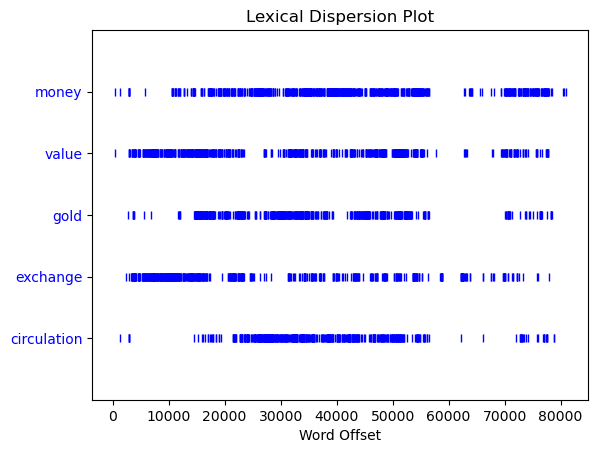

In [15]:
lemm_text.dispersion_plot(most_freq_words)

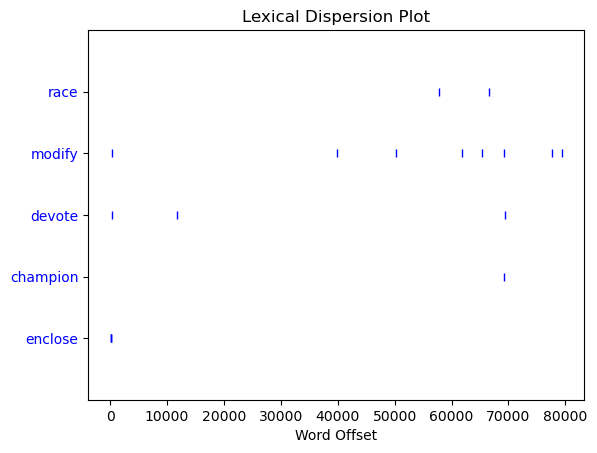

In [16]:
lemm_text.dispersion_plot(median_words)

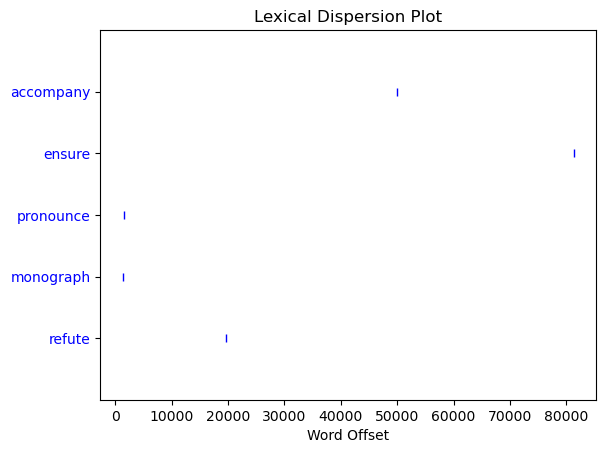

In [17]:
lemm_text.dispersion_plot(most_rare_words)

## Задание 2

In [18]:
# https://www.nltk.org/api/nltk.tokenize.html

# предложения с 100 по 115 попадают на содержание, поэтому возьму предложения с 1100 по 115
selected_sents = sents[1100:1116]
# преобразуем обратно в текст выбранные предложения
selected_raw = ' '.join(selected_sents)

# Очищаем текст от новых строк
selected_sents = [s.replace("\n", "") for s in selected_sents]

selected_sents[:2]
selected_words = nltk.tokenize.NLTKWordTokenizer().tokenize(selected_sents[0])

In [19]:
# Делаю вывод в виде HTML, чтобы он был красивый и поместился в блок
def display_big_text(title, long_txt):
    outp = dp.HTML(
    '''
    <style>
    p {
        max_height:1000px !important;
        white-space: pre-wrap;
    }
    .container {
        display: grid;
        grid-template-columns: repeat(3, 1fr);
    }
    .block {
        display:block;
        margin-left: 25px;
    }
    .overflow {
        height: 300px;
        overflow-y: scroll;
    }
    </style>
    ''' + f'<h1>{title}</h1><h3 class=\'container\'>{long_txt}</h3>'
    )
    return outp

def test_tokenizers(data, tokenizers, disp_tokens = 5):
    output = ''
    # для каждого токенизатора
    for tokenizer in tokenizers:

        output += "<p class='overflow'>"
        output += f"<span style='color:lightcoral'>Используется токенизатор: {tokenizer.__class__.__name__}</span>\n"

        # для каждого текста/предложения/слова запускаем токенезатор
        for i, s in enumerate(data):
            tokens = tokenizer.tokenize(s)

            output += f"<span style='color:lightgreen'>  Предложение {i+1}. Количество токенов: {len(tokens)}\n</span>"
            output += "<span class='block'>"

            # каждый токен визуализируем
            for j, t in enumerate(tokens[:disp_tokens]):
                t = t.replace("\n", "")
                output += f"<span style='color:lightblue'>{j+1}</span>. {t}\n"
            output += '</span>'
        output += '</p>'
    return output

def test_tokenizers_print(data, tokenizers, disp_tokens = 5):
    # для каждого токенизатора
    for tokenizer in tokenizers:
        print('Используется токенизатор:', tokenizer.__class__.__name__)

        # для каждого текста/предложения/слова запускаем токенезатор
        for i, s in enumerate(data):
            tokens = tokenizer.tokenize(s)
            print(f"    Предложение {i+1}. Количество токенов: {len(tokens)}")

            # каждый токен визуализируем
            print(end='\t')
            for j, t in enumerate(tokens[:disp_tokens]):
                t = t.replace("\n", "")
                print(f"{j+1}. {t[:30]}", end=' | ')
            print()

In [20]:
# токенизаторы, работающие на коротких предложениях
sents_tokenizers = [
    CustomTokenizer(),
    # Улучшенная версия TreebankWordTokenizer, нужно, чтобы текст уже был разбит на предложения. Обрабатывает многие сокращения.
    # Применение регулярных выражений изменит исходный текст без возможности восстановления
    nltk.tokenize.NLTKWordTokenizer(),

    # SExprTokenizer используется для поиска выражений в скобках в строке.
    # В частности, он делит строку на последовательность подстрок, которые являются либо выражениями в скобках (включая любые вложенные выражения в скобках)
    nltk.SExprTokenizer(),

    # RegexpTokenizer разбивает строку на подстроки, используя регулярное выражение.
    # Например, следующий токенизатор формирует токены из буквенных последовательностей, денежных выражений и любых других последовательностей, не содержащих пробелов:
    nltk.RegexpTokenizer('\w+|\$[\d\.]+|\S+'),

    # Токенезирует строку, используя пробел в качестве разделителя, который совпадает с s.split(' ').
    nltk.tokenize.SpaceTokenizer(),

    # На вход которого подается по одному предложению. Работа токенизатора основана на последовательном
    # применении к исходному тексту списка регулярных выражений. Не всегда отделяет знаки препинания от слов.
    nltk.ToktokTokenizer(),

    # В лингвистике Treebank – это проанализированный текстовый корпус, который аннотирует синтаксическую или семантическую структуру предложения.
    # Разделяются стандартные сокращения для английского языка, большинство знаков препинания, разделяются на отдельные токены;
    nltk.TreebankWordTokenizer(),

    # Поддержка коротких сообщений в Twitter (смайлики, как текстовые, так и обычные, теги пользователей и т.п.)
    nltk.tokenize.TweetTokenizer(),
]

display_big_text('Sents tokenizers', test_tokenizers(selected_sents, sents_tokenizers))

In [21]:
test_tokenizers_print(selected_sents[:3], sents_tokenizers)

Используется токенизатор: CustomTokenizer
    Предложение 1. Количество токенов: 59
	1. Just | 2. as | 3. gold | 4. coin | 5. is | 
    Предложение 2. Количество токенов: 20
	1. In | 2. England | 3. e | 4. g | 5. copper | 
    Предложение 3. Количество токенов: 55
	1. If | 2. silver | 3. and | 4. copper | 5. tokens | 
Используется токенизатор: NLTKWordTokenizer
    Предложение 1. Количество токенов: 61
	1. Just | 2. as | 3. gold | 4. coin | 5. is | 
    Предложение 2. Количество токенов: 20
	1. In | 2. England | 3. e.g. | 4. copper | 5. is | 
    Предложение 3. Количество токенов: 58
	1. If | 2. silver | 3. and | 4. copper | 5. tokens | 
Используется токенизатор: SExprTokenizer
    Предложение 1. Количество токенов: 1
	1. Just as gold coin is prevented | 
    Предложение 2. Количество токенов: 1
	1. In England e.g. copper is lega | 
    Предложение 3. Количество токенов: 1
	1. If silver and copper tokens we | 
Используется токенизатор: RegexpTokenizer
    Предложение 1. Количество токе

In [22]:
# Токенизаторы, работающие на словах
words_tokenizers = [
    # Sonority Sequencing Principle (SSP). Принимает слово и разбивает его на слоги фонетически.
    nltk.SyllableTokenizer(),
    # Разбивает слова по слогам, основываясь на принципе правильности и максимизации наборов.
    # Конструктор принимает список доступных токенов и список всех гласных в языке. Принимает слово для токенизации.
    nltk.tokenize.LegalitySyllableTokenizer(nltk.corpus.words.words())
]

display_big_text('Words tokenizers', test_tokenizers(selected_words, words_tokenizers))

In [23]:
test_tokenizers_print(selected_words[5:10], words_tokenizers)

Используется токенизатор: SyllableTokenizer
    Предложение 1. Количество токенов: 3
	1. pre | 2. ven | 3. ted | 
    Предложение 2. Количество токенов: 5
	1. from | 2. per | 3. ma | 4. nen | 5. tly | 
    Предложение 3. Количество токенов: 3
	1. re | 2. tai | 3. ning | 
    Предложение 4. Количество токенов: 1
	1. its | 
    Предложение 5. Количество токенов: 2
	1. func | 2. tion | 
Используется токенизатор: LegalitySyllableTokenizer
    Предложение 1. Количество токенов: 3
	1. pre | 2. ven | 3. ted | 
    Предложение 2. Количество токенов: 5
	1. from | 2. per | 3. ma | 4. nent | 5. ly | 
    Предложение 3. Количество токенов: 4
	1. re | 2. ta | 3. i | 4. ning | 
    Предложение 4. Количество токенов: 1
	1. its | 
    Предложение 5. Количество токенов: 2
	1. funct | 2. ion | 


In [24]:
# Токенизаторы, работающие на тексте
text_tokenizers = [
    # PunktSentenceTokenizer делит текст на список предложений, используя неконтролируемый алгоритм для построения модели
    #  для слов-сокращений, словосочетаний и слов, с которых начинаются предложения.
    # Он должен быть обучен на большом наборе открытого текста на целевом языке, прежде чем его можно будет использовать.
    # Тут он загружется готовый, уже обученный для английского языка
    nltk.data.load('tokenizers/punkt/english.pickle'),

    # TextTiling – это метод автоматического разделения полноразмерных текстовых документов на последовательные блоки,
    # состоящие из нескольких абзацев, которые представляют собой отрывки или подтемы.
    # Алгоритм предполагает, что в ходе описания подтемы используется определенный набор слов, и когда подтема изменяется,
    # значительная часть словарного запаса также изменяется.
    # w (int) – размер псевдопредложения, на которые разбивается исходный текст; k (int) – размер блока (в предложениях),
    # Исходный текст можно очистить от стоп-слов, используя параметр stopwords
    nltk.TextTilingTokenizer(w=2, k=2, stopwords=stopwords)
]

display_big_text('Text tokenizers', test_tokenizers([selected_raw], text_tokenizers))

In [25]:
test_tokenizers_print([selected_raw], text_tokenizers)

Используется токенизатор: PunktSentenceTokenizer
    Предложение 1. Количество токенов: 16
	1. Just as gold coin is prevented | 2. In England e.g. copper is lega | 3. If silver and copper tokens we | 4. Thus in 1798 English copper co | 5. [79]The silver and copper toke | 
Используется токенизатор: TextTilingTokenizer
    Предложение 1. Количество токенов: 2
	1. Just as gold coin is prevented | 2. The silver and copper tokens w | 


In [26]:
tokenizer = nltk.tokenize.MWETokenizer([('a', 'little'), ('a', 'little', 'bit'), ('a', 'lot')])
tokenizer.add_mwe(('in', 'spite', 'of'))
tokenizer.tokenize('In a little or a little bit or a lot in sprite of'.split())

['In', 'a_little', 'or', 'a_little_bit', 'or', 'a_lot', 'in', 'sprite', 'of']